In [954]:
import numpy as np
import pandas as pd
import tensorflow as tf
import cassiopeia as cass
import matplotlib.pyplot as plt
import xgboost as xgb

from scipy import stats
from sklearn.metrics import accuracy_score
from sklearn.utils import shuffle
from keras.callbacks import EarlyStopping
from collections import Counter
from tensorflow import keras
from tensorflow.keras import layers
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

In [955]:
# gold_games = pd.read_csv("matches-gold1.csv")
# gold_games2 = pd.read_csv("matches-gold2.csv")
# plat_games = pd.read_csv("matches-plat1.csv")
# plat_games2 = pd.read_csv("matches-plat2.csv")
# plat_games3 = pd.read_csv("matches-plat3.csv")
# plat_games4 = pd.read_csv("matches-plat4.csv")
# diamond_games = pd.read_csv("matches-diamond1.csv")
# diamond_games2 = pd.read_csv("matches-diamond2.csv")

In [956]:
#concat_dfs = [gold_games,gold_games2,plat_games,plat_games2,plat_games3,plat_games4,diamond_games,diamond_games2]

In [957]:
#All_Games = pd.concat(concat_dfs,ignore_index=True)

In [958]:
All_Games = pd.read_csv("All_Matches.csv")

In [959]:
pd.options.display.max_columns = None

In [960]:
All_Games.shape

(561, 189)

In [961]:
All_Games.head(10)

,ID,Win,Side,Rank,Top_Current_Champ,Top_games_on_role,Top_games_on_champ,Jg_Current_Champ,Jg_games_on_role,Jg_games_on_champ,Mid_Current_Champ,Mid_games_on_role,Mid_games_on_champ,Bot_Current_Champ,Bot_games_on_role,Bot_games_on_champ,Sup_Current_Champ,Sup_games_on_role,Sup_games_on_champ,Top_Enemy_Champ,Jg_Enemy_Champ,Mid_Enemy_Champ,Bot_Enemy_Champ,Sup_Enemy_Champ,Top_First_Bloods,Top_Double_Kills,Top_Triple_Kills,Top_Quadra_Kills,Top_Penta_Kills,Top_CS_5,Top_Kills_5,Top_Deaths_5,Top_Assists_5,Top_CS_10,Top_Kills_10,Top_Deaths_10,Top_Assists_10,Top_CS_15,Top_Kills_15,Top_Deaths_15,Top_Assists_15,Top_KDA,Top_Kills,Top_Deaths,Top_Assists,Top_CS,Top_Damage_Dealt,Top_Damage_Taken,Top_Gold_Earned,Top_Turret_Damage,Top_Turret_Kills,Top_Turrt_Takedowns,Top_VisionW_Bought,Top_VisionW_Placed,Top_Wards_Placed,Top_Wards_Killed,Top_CC_Score,Jg_First_Bloods,Jg_Double_Kills,Jg_Triple_Kills,Jg_Quadra_Kills,Jg_Penta_Kills,Jg_CS_5,Jg_Kills_5,Jg_Deaths_5,Jg_Assists_5,Jg_CS_10,Jg_Kills_10,Jg_Deaths_10,Jg_Assists_10,Jg_CS_15,Jg_Kills_15,Jg_Deaths_15,Jg_Assists_15,Jg_KDA,Jg_Kills,Jg_Deaths,Jg_Assists,Jg_CS,Jg_Damage_Dealt,Jg_Damage_Taken,Jg_Gold_Earned,Jg_Turret_Damage,Jg_Turret_Kills,Jg_Turrt_Takedowns,Jg_VisionW_Bought,Jg_VisionW_Placed,Jg_Wards_Placed,Jg_Wards_Killed,Jg_CC_Score,Mid_First_Bloods,Mid_Double_Kills,Mid_Triple_Kills,Mid_Quadra_Kills,Mid_Penta_Kills,Mid_CS_5,Mid_Kills_5,Mid_Deaths_5,Mid_Assists_5,Mid_CS_10,Mid_Kills_10,Mid_Deaths_10,Mid_Assists_10,Mid_CS_15,Mid_Kills_15,Mid_Deaths_15,Mid_Assists_15,Mid_KDA,Mid_Kills,Mid_Deaths,Mid_Assists,Mid_CS,Mid_Damage_Dealt,Mid_Damage_Taken,Mid_Gold_Earned,Mid_Turret_Damage,Mid_Turret_Kills,Mid_Turrt_Takedowns,Mid_VisionW_Bought,Mid_VisionW_Placed,Mid_Wards_Placed,Mid_Wards_Killed,Mid_CC_Score,Bot_First_Bloods,Bot_Double_Kills,Bot_Triple_Kills,Bot_Quadra_Kills,Bot_Penta_Kills,Bot_CS_5,Bot_Kills_5,Bot_Deaths_5,Bot_Assists_5,Bot_CS_10,Bot_Kills_10,Bot_Deaths_10,Bot_Assists_10,Bot_CS_15,Bot_Kills_15,Bot_Deaths_15,Bot_Assists_15,Bot_KDA,Bot_Kills,Bot_Deaths,Bot_Assists,Bot_CS,Bot_Damage_Dealt,Bot_Damage_Taken,Bot_Gold_Earned,Bot_Turret_Damage,Bot_Turret_Kills,Bot_Turrt_Takedowns,Bot_VisionW_Bought,Bot_VisionW_Placed,Bot_Wards_Placed,Bot_Wards_Killed,Bot_CC_Score,Sup_First_Bloods,Sup_Double_Kills,Sup_Triple_Kills,Sup_Quadra_Kills,Sup_Penta_Kills,Sup_CS_5,Sup_Kills_5,Sup_Deaths_5,Sup_Assists_5,Sup_CS_10,Sup_Kills_10,Sup_Deaths_10,Sup_Assists_10,Sup_CS_15,Sup_Kills_15,Sup_Deaths_15,Sup_Assists_15,Sup_KDA,Sup_Kills,Sup_Deaths,Sup_Assists,Sup_CS,Sup_Damage_Dealt,Sup_Damage_Taken,Sup_Gold_Earned,Sup_Turret_Damage,Sup_Turret_Kills,Sup_Turrt_Takedowns,Sup_VisionW_Bought,Sup_VisionW_Placed,Sup_Wards_Placed,Sup_Wards_Killed,Sup_CC_Score
0,4272358677,False,Red,Gold,Gragas,6,0,Vi,17,10,Vladimir,0,0,Draven,20,15,Pyke,19,5,Teemo,Poppy,Morgana,Jhin,Renata Glasc,0,8,0,0,0,16.25,0.25,0.15,0.25,39.80,0.95,1.15,0.85,1.50,2.60,1.80,64.00,2.080247,3.65,6.55,7.70,130.00,14193.60,21993.50,10168.10,2925.80,1.10,1.85,0.30,0.25,12.15,1.75,19.05,0,11,1,0,0,20.90,0.30,0.40,0.40,43.10,1.25,1.35,0.95,2.90,2.45,2.40,58.30,2.315952,7.20,7.60,7.05,126.35,16766.75,26131.95,11596.00,1187.50,1.05,1.80,3.80,3.20,6.50,3.35,20.90,1,17,1,0,0,21.25,0.40,0.75,0.50,52.35,1.15,1.75,1.15,2.00,3.00,1.75,84.35,2.052915,7.10,7.40,7.30,191.30,22446.30,27976.35,12900.05,2184.20,0.80,1.40,0.60,0.60,11.15,3.05,14.35,1,19,3,0,0,26.65,0.20,0.85,0.35,62.95,1.05,2.25,1.05,2.45,3.90,1.75,97.75,2.087438,6.85,8.60,6.45,193.60,21023.90,20242.20,12650.65,3746.70,1.20,2.35,0.05,0.05,7.60,2.15,12.70,0,4,0,0,0,5.15,0.20,0.25,0.65,11.00,0.70,0.75,1.70,1.45,1.60,3.25,19.50,4.698690,3.15,4.85,11.90,38.30,11145.40,15152.80,9566.55,1118.75,0.35,1.80,2.40,2.15,25.15,6.80,28.85
1,4272324079,True,Red,Gold,Teemo,19,4,Lee Sin,0,6,Viktor,17,14,Miss Fortune,0,0,Thresh,12,1,Fiora,Kayn,Ahri,Ezreal,Lux,3,16,3,0,0,23.05,0.50,0.75,0.10,54.40,1.30,2.15,0.35,2.15,3.15,0.65,86.25,1.870790,6.05,8.15,7.00,171.20,21133.35,29675.90,12017.45,4584.75,1.55,2.60,1.50,1.20,8.05,2.15,26.8

In [962]:
# for columnasdf in All_Games:
#     if '5' in columnasdf:
#         All_Games.drop(columns=[columnasdf],inplace=True)
#     if '10' in columnasdf:
#         All_Games.drop(columns=[columnasdf],inplace=True)

In [963]:
# All_Games.head(10)

In [964]:
# All_Games.drop(All_Games.iloc[:, 24:], inplace = True, axis = 1)

In [965]:
# All_Games.head(3)

In [966]:
All_Games["Win"] = All_Games["Win"].astype(int)

All_Games["Side"] = All_Games["Side"].astype('category')
All_Games["Side"] = All_Games["Side"].cat.codes

All_Games.drop(['ID', 'Rank'], axis=1, inplace=True)

In [967]:
All_Games.head(10)

,Win,Side,Top_Current_Champ,Top_games_on_role,Top_games_on_champ,Jg_Current_Champ,Jg_games_on_role,Jg_games_on_champ,Mid_Current_Champ,Mid_games_on_role,Mid_games_on_champ,Bot_Current_Champ,Bot_games_on_role,Bot_games_on_champ,Sup_Current_Champ,Sup_games_on_role,Sup_games_on_champ,Top_Enemy_Champ,Jg_Enemy_Champ,Mid_Enemy_Champ,Bot_Enemy_Champ,Sup_Enemy_Champ,Top_First_Bloods,Top_Double_Kills,Top_Triple_Kills,Top_Quadra_Kills,Top_Penta_Kills,Top_CS_5,Top_Kills_5,Top_Deaths_5,Top_Assists_5,Top_CS_10,Top_Kills_10,Top_Deaths_10,Top_Assists_10,Top_CS_15,Top_Kills_15,Top_Deaths_15,Top_Assists_15,Top_KDA,Top_Kills,Top_Deaths,Top_Assists,Top_CS,Top_Damage_Dealt,Top_Damage_Taken,Top_Gold_Earned,Top_Turret_Damage,Top_Turret_Kills,Top_Turrt_Takedowns,Top_VisionW_Bought,Top_VisionW_Placed,Top_Wards_Placed,Top_Wards_Killed,Top_CC_Score,Jg_First_Bloods,Jg_Double_Kills,Jg_Triple_Kills,Jg_Quadra_Kills,Jg_Penta_Kills,Jg_CS_5,Jg_Kills_5,Jg_Deaths_5,Jg_Assists_5,Jg_CS_10,Jg_Kills_10,Jg_Deaths_10,Jg_Assists_10,Jg_CS_15,Jg_Kills_15,Jg_Deaths_15,Jg_Assists_15,Jg_KDA,Jg_Kills,Jg_Deaths,Jg_Assists,Jg_CS,Jg_Damage_Dealt,Jg_Damage_Taken,Jg_Gold_Earned,Jg_Turret_Damage,Jg_Turret_Kills,Jg_Turrt_Takedowns,Jg_VisionW_Bought,Jg_VisionW_Placed,Jg_Wards_Placed,Jg_Wards_Killed,Jg_CC_Score,Mid_First_Bloods,Mid_Double_Kills,Mid_Triple_Kills,Mid_Quadra_Kills,Mid_Penta_Kills,Mid_CS_5,Mid_Kills_5,Mid_Deaths_5,Mid_Assists_5,Mid_CS_10,Mid_Kills_10,Mid_Deaths_10,Mid_Assists_10,Mid_CS_15,Mid_Kills_15,Mid_Deaths_15,Mid_Assists_15,Mid_KDA,Mid_Kills,Mid_Deaths,Mid_Assists,Mid_CS,Mid_Damage_Dealt,Mid_Damage_Taken,Mid_Gold_Earned,Mid_Turret_Damage,Mid_Turret_Kills,Mid_Turrt_Takedowns,Mid_VisionW_Bought,Mid_VisionW_Placed,Mid_Wards_Placed,Mid_Wards_Killed,Mid_CC_Score,Bot_First_Bloods,Bot_Double_Kills,Bot_Triple_Kills,Bot_Quadra_Kills,Bot_Penta_Kills,Bot_CS_5,Bot_Kills_5,Bot_Deaths_5,Bot_Assists_5,Bot_CS_10,Bot_Kills_10,Bot_Deaths_10,Bot_Assists_10,Bot_CS_15,Bot_Kills_15,Bot_Deaths_15,Bot_Assists_15,Bot_KDA,Bot_Kills,Bot_Deaths,Bot_Assists,Bot_CS,Bot_Damage_Dealt,Bot_Damage_Taken,Bot_Gold_Earned,Bot_Turret_Damage,Bot_Turret_Kills,Bot_Turrt_Takedowns,Bot_VisionW_Bought,Bot_VisionW_Placed,Bot_Wards_Placed,Bot_Wards_Killed,Bot_CC_Score,Sup_First_Bloods,Sup_Double_Kills,Sup_Triple_Kills,Sup_Quadra_Kills,Sup_Penta_Kills,Sup_CS_5,Sup_Kills_5,Sup_Deaths_5,Sup_Assists_5,Sup_CS_10,Sup_Kills_10,Sup_Deaths_10,Sup_Assists_10,Sup_CS_15,Sup_Kills_15,Sup_Deaths_15,Sup_Assists_15,Sup_KDA,Sup_Kills,Sup_Deaths,Sup_Assists,Sup_CS,Sup_Damage_Dealt,Sup_Damage_Taken,Sup_Gold_Earned,Sup_Turret_Damage,Sup_Turret_Kills,Sup_Turrt_Takedowns,Sup_VisionW_Bought,Sup_VisionW_Placed,Sup_Wards_Placed,Sup_Wards_Killed,Sup_CC_Score
0,0,1,Gragas,6,0,Vi,17,10,Vladimir,0,0,Draven,20,15,Pyke,19,5,Teemo,Poppy,Morgana,Jhin,Renata Glasc,0,8,0,0,0,16.25,0.25,0.15,0.25,39.80,0.95,1.15,0.85,1.50,2.60,1.80,64.00,2.080247,3.65,6.55,7.70,130.00,14193.60,21993.50,10168.10,2925.80,1.10,1.85,0.30,0.25,12.15,1.75,19.05,0,11,1,0,0,20.90,0.30,0.40,0.40,43.10,1.25,1.35,0.95,2.90,2.45,2.40,58.30,2.315952,7.20,7.60,7.05,126.35,16766.75,26131.95,11596.00,1187.50,1.05,1.80,3.80,3.20,6.50,3.35,20.90,1,17,1,0,0,21.25,0.40,0.75,0.50,52.35,1.15,1.75,1.15,2.00,3.00,1.75,84.35,2.052915,7.10,7.40,7.30,191.30,22446.30,27976.35,12900.05,2184.20,0.80,1.40,0.60,0.60,11.15,3.05,14.35,1,19,3,0,0,26.65,0.20,0.85,0.35,62.95,1.05,2.25,1.05,2.45,3.90,1.75,97.75,2.087438,6.85,8.60,6.45,193.60,21023.90,20242.20,12650.65,3746.70,1.20,2.35,0.05,0.05,7.60,2.15,12.70,0,4,0,0,0,5.15,0.20,0.25,0.65,11.00,0.70,0.75,1.70,1.45,1.60,3.25,19.50,4.698690,3.15,4.85,11.90,38.30,11145.40,15152.80,9566.55,1118.75,0.35,1.80,2.40,2.15,25.15,6.80,28.85
1,1,1,Teemo,19,4,Lee Sin,0,6,Viktor,17,14,Miss Fortune,0,0,Thresh,12,1,Fiora,Kayn,Ahri,Ezreal,Lux,3,16,3,0,0,23.05,0.50,0.75,0.10,54.40,1.30,2.15,0.35,2.15,3.15,0.65,86.25,1.870790,6.05,8.15,7.00,171.20,21133.35,29675.90,12017.45,4584.75,1.55,2.60,1.50,1.20,8.05,2.15,26.85,1,2,1,0,0,24.85,0.45,0.40,0.25,65.30,0.90,1.15,0.

In [968]:
one_hot_encoded_data = pd.get_dummies(All_Games, columns = ["Top_Current_Champ", "Jg_Current_Champ", "Mid_Current_Champ", "Bot_Current_Champ", "Sup_Current_Champ","Top_Enemy_Champ", "Jg_Enemy_Champ", "Mid_Enemy_Champ", "Bot_Enemy_Champ", "Sup_Enemy_Champ"])

In [969]:
one_hot_encoded_data.head(5)

,Win,Side,Top_games_on_role,Top_games_on_champ,Jg_games_on_role,Jg_games_on_champ,Mid_games_on_role,Mid_games_on_champ,Bot_games_on_role,Bot_games_on_champ,Sup_games_on_role,Sup_games_on_champ,Top_First_Bloods,Top_Double_Kills,Top_Triple_Kills,Top_Quadra_Kills,Top_Penta_Kills,Top_CS_5,Top_Kills_5,Top_Deaths_5,Top_Assists_5,Top_CS_10,Top_Kills_10,Top_Deaths_10,Top_Assists_10,Top_CS_15,Top_Kills_15,Top_Deaths_15,Top_Assists_15,Top_KDA,Top_Kills,Top_Deaths,Top_Assists,Top_CS,Top_Damage_Dealt,Top_Damage_Taken,Top_Gold_Earned,Top_Turret_Damage,Top_Turret_Kills,Top_Turrt_Takedowns,Top_VisionW_Bought,Top_VisionW_Placed,Top_Wards_Placed,Top_Wards_Killed,Top_CC_Score,Jg_First_Bloods,Jg_Double_Kills,Jg_Triple_Kills,Jg_Quadra_Kills,Jg_Penta_Kills,Jg_CS_5,Jg_Kills_5,Jg_Deaths_5,Jg_Assists_5,Jg_CS_10,Jg_Kills_10,Jg_Deaths_10,Jg_Assists_10,Jg_CS_15,Jg_Kills_15,Jg_Deaths_15,Jg_Assists_15,Jg_KDA,Jg_Kills,Jg_Deaths,Jg_Assists,Jg_CS,Jg_Damage_Dealt,Jg_Damage_Taken,Jg_Gold_Earned,Jg_Turret_Damage,Jg_Turret_Kills,Jg_Turrt_Takedowns,Jg_VisionW_Bought,Jg_VisionW_Placed,Jg_Wards_Placed,Jg_Wards_Killed,Jg_CC_Score,Mid_First_Bloods,Mid_Double_Kills,Mid_Triple_Kills,Mid_Quadra_Kills,Mid_Penta_Kills,Mid_CS_5,Mid_Kills_5,Mid_Deaths_5,Mid_Assists_5,Mid_CS_10,Mid_Kills_10,Mid_Deaths_10,Mid_Assists_10,Mid_CS_15,Mid_Kills_15,Mid_Deaths_15,Mid_Assists_15,Mid_KDA,Mid_Kills,Mid_Deaths,Mid_Assists,Mid_CS,Mid_Damage_Dealt,Mid_Damage_Taken,Mid_Gold_Earned,Mid_Turret_Damage,Mid_Turret_Kills,Mid_Turrt_Takedowns,Mid_VisionW_Bought,Mid_VisionW_Placed,Mid_Wards_Placed,Mid_Wards_Killed,Mid_CC_Score,Bot_First_Bloods,Bot_Double_Kills,Bot_Triple_Kills,Bot_Quadra_Kills,Bot_Penta_Kills,Bot_CS_5,Bot_Kills_5,Bot_Deaths_5,Bot_Assists_5,Bot_CS_10,Bot_Kills_10,Bot_Deaths_10,Bot_Assists_10,Bot_CS_15,Bot_Kills_15,Bot_Deaths_15,Bot_Assists_15,Bot_KDA,Bot_Kills,Bot_Deaths,Bot_Assists,Bot_CS,Bot_Damage_Dealt,Bot_Damage_Taken,Bot_Gold_Earned,Bot_Turret_Damage,Bot_Turret_Kills,Bot_Turrt_Takedowns,Bot_VisionW_Bought,Bot_VisionW_Placed,Bot_Wards_Placed,Bot_Wards_Killed,Bot_CC_Score,Sup_First_Bloods,Sup_Double_Kills,Sup_Triple_Kills,Sup_Quadra_Kills,Sup_Penta_Kills,Sup_CS_5,Sup_Kills_5,Sup_Deaths_5,Sup_Assists_5,Sup_CS_10,Sup_Kills_10,Sup_Deaths_10,Sup_Assists_10,Sup_CS_15,Sup_Kills_15,Sup_Deaths_15,Sup_Assists_15,Sup_KDA,Sup_Kills,Sup_Deaths,Sup_Assists,Sup_CS,Sup_Damage_Dealt,Sup_Damage_Taken,Sup_Gold_Earned,Sup_Turret_Damage,Sup_Turret_Kills,Sup_Turrt_Takedowns,Sup_VisionW_Bought,Sup_VisionW_Placed,Sup_Wards_Placed,Sup_Wards_Killed,Sup_CC_Score,Top_Current_Champ_Aatrox,Top_Current_Champ_Akali,Top_Current_Champ_Akshan,Top_Current_Champ_Alistar,Top_Current_Champ_Anivia,Top_Current_Champ_Annie,Top_Current_Champ_Camille,Top_Current_Champ_Cho'Gath,Top_Current_Champ_Darius,Top_Current_Champ_Dr. Mundo,Top_Current_Champ_Draven,Top_Current_Champ_Ekko,Top_Current_Champ_Fiora,Top_Current_Champ_Galio,Top_Current_Champ_Gangplank,Top_Current_Champ_Garen,Top_Current_Champ_Gnar,Top_Current_Champ_Gragas,Top_Current_Champ_Graves,Top_Current_Champ_Gwen,Top_Current_Champ_Illaoi,Top_Current_Champ_Irelia,Top_Current_Champ_Jax,Top_Current_Champ_Jayce,Top_Current_Champ_Karma,Top_Current_Champ_Katarina,Top_Current_Champ_Kayle,Top_Current_Champ_Kennen,Top_Current_Champ_Kindred,Top_Current_Champ_Kled,Top_Current_Champ_Lillia,Top_Current_Champ_Lissandra,Top_Current_Champ_Malphite,Top_Current_Champ_Maokai,Top_Current_Champ_Mordekaiser,Top_Current_Champ_Nasus,Top_Current_Champ_Nautilus,Top_Current_Champ_Ornn,Top_Current_Champ_Poppy,Top_Current_Champ_Quinn,Top_Current_Champ_Renekton,Top_Current_Champ_Rengar,Top_Current_Champ_Riven,Top_Current_Champ_Ryze,Top_Current_Champ_Sejuani,Top_Current_Champ_Seraphine,Top_Current_Champ_Sett,Top_Current_Champ_Shen,Top_Current_Champ_Shyvana,Top_Current_Champ_Singed,Top_Current_Champ_Sion,Top_Current_Champ_Sylas,Top_Current_Champ_Tahm Kench,Top_Current_Champ_Teemo,Top_Current_Champ_Trundle,Top_Current_Champ_Tryndamere,Top_Current_Champ_Urgot,Top_Current_Champ_Vayne,Top_Current_Cham

In [970]:
one_hot_encoded_data = shuffle(one_hot_encoded_data)

In [971]:
X = one_hot_encoded_data.iloc[:,1:]
y = one_hot_encoded_data.iloc[:,0]

In [972]:
#X_train, X_test, Y_train, Y_test = train_test_split(X, y, test_size=0.15, shuffle=True)


#X_train, X_test, Y_train, Y_test = train_test_split(X, y, test_size=0.15)




train_ratio = 0.80
test_ratio = 0.10
validation_ratio = 0.10

X_train, X_test, Y_train, Y_test = train_test_split(X, y, test_size=test_ratio)

X_train, X_valid, Y_train, Y_valid = train_test_split(X_train, Y_train, test_size=validation_ratio/(train_ratio+test_ratio))


In [973]:
model_one_hot = keras.Sequential() # create model

model_one_hot.add(layers.Dense(512, input_dim=762, activation='relu')) # Input layer

model_one_hot.add(layers.Dense(512, activation='relu')) # hidden layer

model_one_hot.add(layers.Dense(1, activation='sigmoid')) # output layer

model_one_hot.compile(loss='binary_crossentropy', optimizer='adam', metrics=['acc'])

model_one_hot.summary()

Model: "sequential_33"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_99 (Dense)            (None, 512)               390656    
                                                                 
 dense_100 (Dense)           (None, 512)               262656    
                                                                 
 dense_101 (Dense)           (None, 1)                 513       
                                                                 
Total params: 653,825
Trainable params: 653,825
Non-trainable params: 0
_________________________________________________________________


In [974]:
#es = EarlyStopping(monitor='val_acc', mode='max', patience=3, restore_best_weights=True)

es = EarlyStopping(monitor='val_loss', mode='min', patience=12, restore_best_weights=True)

In [975]:
#with tf.device('/GPU:0'):
#    fit_model_one_hot = model_one_hot.fit(X_train, Y_train, epochs=35)



#with tf.device('/GPU:0'):
#    fit_model_one_hot = model_one_hot.fit(X_train, Y_train, validation_data=(X_test, Y_test), epochs=35)


#with tf.device('/GPU:0'):
#    fit_model_one_hot = model_one_hot.fit(X_train_scaled, Y_train, validation_split=0.15, epochs=25)

with tf.device('/GPU:0'):
    fit_model_one_hot = model_one_hot.fit(X_train, Y_train, validation_data=(X_valid,Y_valid), epochs=250, callbacks=es)

Epoch 1/250
14/14 [==============================] - 1s 31ms/step - loss: 1918.6479 - acc: 0.4944 - val_loss: 1367.7913 - val_acc: 0.5088
Epoch 2/250
14/14 [==============================] - 0s 5ms/step - loss: 581.5561 - acc: 0.5280 - val_loss: 451.7152 - val_acc: 0.5088
Epoch 3/250
14/14 [==============================] - 0s 4ms/step - loss: 164.2205 - acc: 0.5213 - val_loss: 63.5175 - val_acc: 0.4912
Epoch 4/250
14/14 [==============================] - 0s 5ms/step - loss: 98.9199 - acc: 0.4922 - val_loss: 32.6353 - val_acc: 0.4912
Epoch 5/250
14/14 [==============================] - 0s 5ms/step - loss: 53.9597 - acc: 0.5257 - val_loss: 18.5037 - val_acc: 0.6140
Epoch 6/250
14/14 [==============================] - 0s 4ms/step - loss: 38.7214 - acc: 0.5145 - val_loss: 34.6120 - val_acc: 0.5614
Epoch 7/250
14/14 [==============================] - 0s 5ms/step - loss: 20.2907 - acc: 0.5817 - val_loss: 13.4601 - val_acc: 0.6491
Epoch 8/250
14/14 [==============================] - 0s 4ms/s

In [976]:
score = model_one_hot.evaluate(X_test, Y_test,verbose=0)
print(f'Test loss: {score[0]} / Test accuracy: {score[1]}')

Test loss: 7.404855251312256 / Test accuracy: 0.5964912176132202


In [977]:
#model_one_hot.save("Model61.h5")

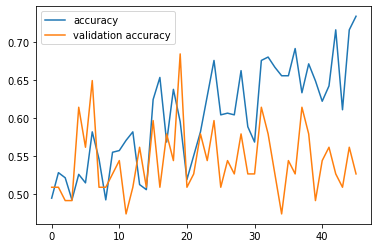

In [978]:
plt.plot(fit_model_one_hot.history['acc'])
plt.plot(fit_model_one_hot.history['val_acc'])
plt.legend(['accuracy','validation accuracy'])

In [979]:
# X_train, X_test, Y_train, Y_test = train_test_split(X, y, test_size=0.15)

# scaler = StandardScaler().fit(X_train)

# X_train_scaled = scaler.transform(X_train)

# fit_model_one_hot = model_one_hot.fit(X_train_scaled, Y_train, validation_split=0.15, epochs=25)

# score = model_one_hot.evaluate(X_test, Y_test,verbose=0)

In [980]:
# train_ratio = 0.70
# test_ratio = 0.15
# validation_ratio = 0.15

# X_train, X_test, Y_train, Y_test = train_test_split(X, y, test_size=test_ratio)

# X_train, X_valid, Y_train, Y_valid = train_test_split(X_train, Y_train, test_size=validation_ratio/(train_ratio+test_ratio))

# scaler = StandardScaler().fit(X_train)

# X_train_scaled = scaler.transform(X_train)
# X_valid_scaled = scaler.transform(X_valid)
# #X_test_scaled = scaler.transform(X_test)

# fit_model_one_hot = model_one_hot.fit(X_train_scaled, Y_train, validation_data=(X_valid_scaled,Y_valid), epochs=25)

# score = model_one_hot.evaluate(X_test, Y_test,verbose=0)